In [1]:
# Imports and Helper Functions
# data Analysis
import pandas as pd
import numpy as np
import random as rng
import os

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#SciKit Learn Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))
data = pd.read_csv(os.getcwd()+"\\preprocessed_data.csv")
# Any results you write to the current directory are saved as output.

In [2]:
# pd.set_option('display.max_columns', None)

In [3]:

data

,Winner,title_bout,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,...,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Sideways,R_Stance_Southpaw,R_Stance_Switch
0,Red,False,0.000000,0.0,0.420000,0.49500,0.330,0.36000,0.500000,1.000000,...,0,1,0,0,0,0,1,0,0,0
1,Red,False,0.500000,0.0,0.660000,0.30500,0.300,0.50000,1.500000,0.000000,...,0,1,0,0,0,0,1,0,0,0
2,Red,False,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.148468,0.098389,...,0,1,0,0,0,0,0,0,1,0
3,Blue,False,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.148468,0.098389,...,0,0,0,1,0,0,0,0,0,1
4,Blue,False,0.125000,0.0,0.535625,0.57875,0.185,0.16625,0.125000,0.187500,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5897,Red,False,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.148468,0.098389,...,0,1,0,0,0,0,0,0,1,0
5898,Red,False,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.148468,0.098389,...,0,1,0,0,0,0,0,0,1,0
5899,Red,False,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.148468,0.098389,...,0,1,0,0,0,0,1,0,0,0
5900,Red,False,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.148468,0.098389,...,0,1,0,0,0,0,1,0,0,0


In [4]:
# pd.reset_option('^display.', silent=True)

In [5]:
data.select_dtypes(exclude=['int64', 'float64'])

,Winner,title_bout
0,Red,False
1,Red,False
2,Red,False
3,Blue,False
4,Blue,False
...,...,...
5897,Red,False
5898,Red,False
5899,Red,False
5900,Red,False


위의 새로운 데이터를 보면 "Winner" 열과 "title_bout"(아마도 타이틀 전 여부를 표시하는 듯)을 제외하면 모두 숫자형임을 알 수 있다.)

In [6]:
data.describe()

,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,...,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Sideways,R_Stance_Southpaw,R_Stance_Switch
count,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,...,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000
mean,0.193739,0.135246,0.452788,0.432788,0.282610,0.252897,0.400956,0.335873,0.120343,0.108563,...,0.001525,0.764825,0.000678,0.193155,0.039817,0.002542,0.759065,0.000339,0.205015,0.033040
std,0.346475,0.294238,0.114325,0.116189,0.239811,0.235253,0.648117,0.586483,0.307538,0.289504,...,0.039024,0.424144,0.026027,0.394807,0.195546,0.050354,0.427687,0.018407,0.403747,0.178755
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.401611,0.376250,0.100000,0.082733,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.015625,0.000000,0.450000,0.427500,0.250000,0.200000,0.148468,0.098389,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.250000,0.093750,0.500000,0.480000,0.395828,0.330000,0.500000,0.500000,0.031250,0.007820,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,8.000000,7.000000,4.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data.describe(include=['O'])

,Winner
count,5902
unique,2
top,Red
freq,3979


In [8]:
data.head()

,Winner,title_bout,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,...,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Sideways,R_Stance_Southpaw,R_Stance_Switch
0,Red,False,0.000000,0.0,0.420000,0.49500,0.330,0.36000,0.500000,1.000000,...,0,1,0,0,0,0,1,0,0,0
1,Red,False,0.500000,0.0,0.660000,0.30500,0.300,0.50000,1.500000,0.000000,...,0,1,0,0,0,0,1,0,0,0
2,Red,False,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.148468,0.098389,...,0,1,0,0,0,0,0,0,1,0
3,Blue,False,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.148468,0.098389,...,0,0,0,1,0,0,0,0,0,1
4,Blue,False,0.125000,0.0,0.535625,0.57875,0.185,0.16625,0.125000,0.187500,...,0,1,0,0,0,0,1,0,0,0


In [9]:
data.tail()

,Winner,title_bout,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,...,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Sideways,R_Stance_Southpaw,R_Stance_Switch
5897,Red,False,0.015625,0.0,0.45,0.4275,0.25,0.2,0.148468,0.098389,...,0,1,0,0,0,0,0,0,1,0
5898,Red,False,0.015625,0.0,0.45,0.4275,0.25,0.2,0.148468,0.098389,...,0,1,0,0,0,0,0,0,1,0
5899,Red,False,0.015625,0.0,0.45,0.4275,0.25,0.2,0.148468,0.098389,...,0,1,0,0,0,0,1,0,0,0
5900,Red,False,0.015625,0.0,0.45,0.4275,0.25,0.2,0.148468,0.098389,...,0,1,0,0,0,0,1,0,0,0
5901,Red,False,0.015625,0.0,0.45,0.4275,0.25,0.2,0.148468,0.098389,...,0,1,0,0,0,0,1,0,0,0


In [10]:
data.isna().sum().sum()

0

Change any String, Object, Bolean data into numeric data

In [11]:
cat_columns = data.select_dtypes(include=["object", "bool"]).columns
data[cat_columns] = data[cat_columns].astype("category")
data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5902 entries, 0 to 5901
Columns: 160 entries, Winner to R_Stance_Switch
dtypes: float64(106), int64(52), int8(2)
memory usage: 7.1 MB


,Winner,title_bout,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,...,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Sideways,R_Stance_Southpaw,R_Stance_Switch
0,1,0,0.000000,0.0,0.420000,0.49500,0.330,0.36000,0.500000,1.000000,...,0,1,0,0,0,0,1,0,0,0
1,1,0,0.500000,0.0,0.660000,0.30500,0.300,0.50000,1.500000,0.000000,...,0,1,0,0,0,0,1,0,0,0
2,1,0,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.148468,0.098389,...,0,1,0,0,0,0,0,0,1,0
3,0,0,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.148468,0.098389,...,0,0,0,1,0,0,0,0,0,1
4,0,0,0.125000,0.0,0.535625,0.57875,0.185,0.16625,0.125000,0.187500,...,0,1,0,0,0,0,1,0,0,0


In [12]:
data["Winner"].dtype

dtype('int8')

Winner을 제외한 non-numeric data들을 걸러내자

In [ ]:
# cat_data = ["title_bout","B_win_by_Decision_Majority","B_win_by_Decision_Split",
# "B_win_by_Decision_Unanimous","B_win_by_KO/TKO","B_win_by_Submission","B_win_by_TKO_Doctor_Stoppage",
# "R_win_by_Decision_Majority","R_win_by_Decision_Split",
# "R_win_by_Decision_Unanimous","R_win_by_KO/TKO","R_win_by_Submission","R_win_by_TKO_Doctor_Stoppage"]

# dropdata = data.drop(cat_data, axis=1)

In [180]:
pd.reset_option('^display.', silent=True)

In [ ]:
# Basic Correlation Matrix
# corrmat = data.corr()
# f, ax = plt.subplots(figsize=(12, 9))
# sns.heatmap(corrmat, vmax=.8, square=True);

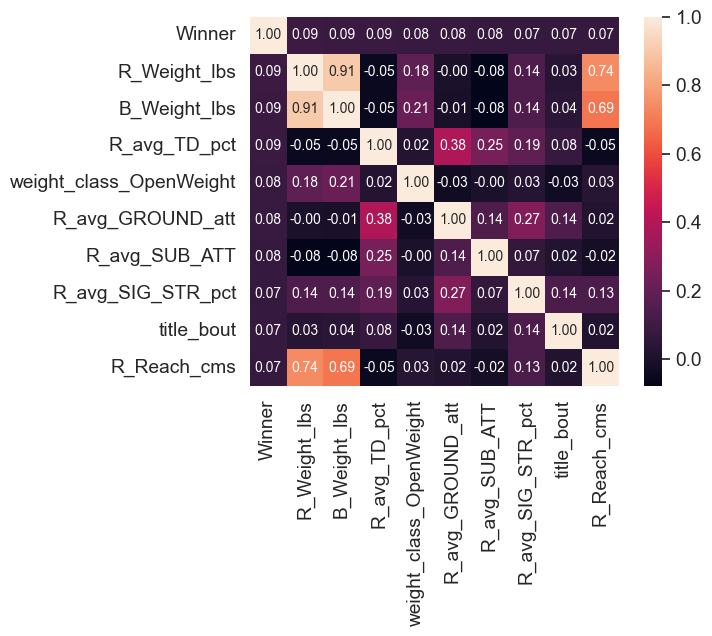

In [205]:
# Subset Correlation Matrix
k = 10 #number of variables for heatmap
corrmat = data.corr()
cols = corrmat.nlargest(k, 'Winner')['Winner'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Modeling
We're evaluating the following models

1. Perceptron
2. Random Forests
3. Decision Trees Classifier
4. SGD Classifier
5. Linear SVC
6. Gaussian NB
7. KNN

In [35]:
 #We Store prediction of each model in our dict
# Helper Functions for our models. 

def percep(X_train,Y_train,X_test,Y_test,Models):
    perceptron = Perceptron(max_iter = 1000, tol = 0.001)
    perceptron.fit(X_train, Y_train)
    Y_pred = perceptron.predict(X_test)
    Models['Perceptron'] = [accuracy_score(Y_test,Y_pred),confusion_matrix(Y_test,Y_pred)]
    return

def ranfor(X_train,Y_train,X_test,Y_test,Models):
    randomfor = RandomForestClassifier(max_features="sqrt",
                                       n_estimators = 700,
                                       max_depth = None,
                                       n_jobs=-1
                                      )
    randomfor.fit(X_train,Y_train)
    Y_pred = randomfor.predict(X_test)
    Models['Random Forests'] = [accuracy_score(Y_test,Y_pred),confusion_matrix(Y_test,Y_pred)]
    return

def dec_tree(X_train,Y_train,X_test,Y_test,Models):
    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X_train, Y_train)
    Y_pred = decision_tree.predict(X_test)
    Models['Decision Tree'] = [accuracy_score(Y_test,Y_pred),confusion_matrix(Y_test,Y_pred)]
    return

def SGDClass(X_train,Y_train,X_test,Y_test,Models):
    sgd = SGDClassifier(max_iter = 1000, tol = 0.001)
    sgd.fit(X_train, Y_train)
    Y_pred = sgd.predict(X_test)
    Models['SGD Classifier'] = [accuracy_score(Y_test,Y_pred),confusion_matrix(Y_test,Y_pred)]
    return

def linSVC(X_train,Y_train,X_test,Y_test,Models):
    linear_svc = LinearSVC()
    linear_svc.fit(X_train, Y_train)
    Y_pred = linear_svc.predict(X_test)
    Models['SVM'] = [accuracy_score(Y_test,Y_pred),confusion_matrix(Y_test,Y_pred)]
    return

def bayes(X_train,Y_train,X_test,Y_test,Models):
    gaussian = GaussianNB()
    gaussian.fit(X_train, Y_train)
    Y_pred = gaussian.predict(X_test)
    Models['Bayes'] = [accuracy_score(Y_test,Y_pred),confusion_matrix(Y_test,Y_pred)]
    return

def Nearest(X_train,Y_train,X_test,Y_test,Models):
    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    Models['KNN'] = [accuracy_score(Y_test,Y_pred),confusion_matrix(Y_test,Y_pred)]

def run_all_and_Plot(df):
    Models = dict()
    from sklearn.model_selection import train_test_split
    X_all = df.drop(['Winner'], axis=1)
    y_all = df['Winner']
    X_train, X_test, Y_train, Y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=0)
    percep(X_train,Y_train,X_test,Y_test,Models)
    ranfor(X_train,Y_train,X_test,Y_test,Models)
    dec_tree(X_train,Y_train,X_test,Y_test,Models)
    SGDClass(X_train,Y_train,X_test,Y_test,Models)
    linSVC(X_train,Y_train,X_test,Y_test,Models)
    bayes(X_train,Y_train,X_test,Y_test,Models)
    Nearest(X_train,Y_train,X_test,Y_test,Models)
    return Models


def plot_bar(dict):
    labels = tuple(dict.keys())
    y_pos = np.arange(len(labels))
    values = [dict[n][0] for n in dict]
    plt.bar(y_pos, values, align='center', alpha=0.5)
    plt.xticks(y_pos, labels,rotation='vertical')
    plt.ylabel('accuracy')
    plt.title('Accuracy of different models')
    plt.show()


def plot_cm(dict):
    count = 1
    fig = plt.figure(figsize=(10,10))
    for model in dict:
        cm = dict[model][1]
        labels = ['W','L','N','D']
        ax = fig.add_subplot(4,4,count)
        cax = ax.matshow(cm)
        plt.title(model,y=-0.8)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + labels)
        ax.set_yticklabels([''] + labels)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        # plt.subplot(2,2,count)
        count+=1
    plt.tight_layout()
    plt.show()

# 1번

c:\Users\charl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Perceptron 0.3657917019475021
Random Forests 0.6858594411515665
Decision Tree 0.5935647756138865
SGD Classifier 0.6672311600338696
SVM 0.6867061812023709
Bayes 0.5309060118543607
KNN 0.6299745977984759


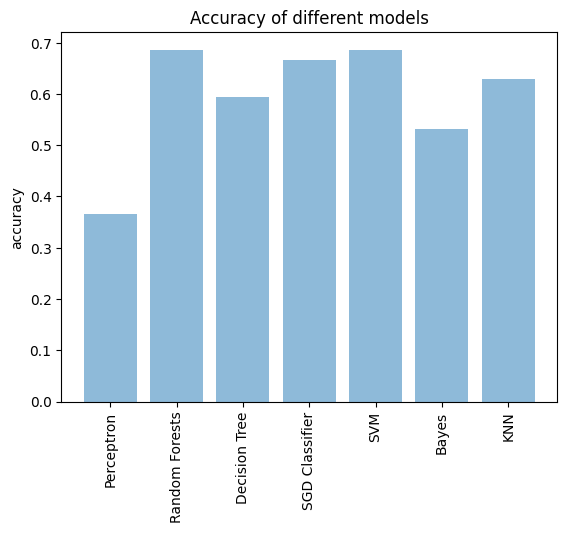

C:\Users\charl\AppData\Local\Temp\ipykernel_13160\3423334572.py:93: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\charl\AppData\Local\Temp\ipykernel_13160\3423334572.py:94: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


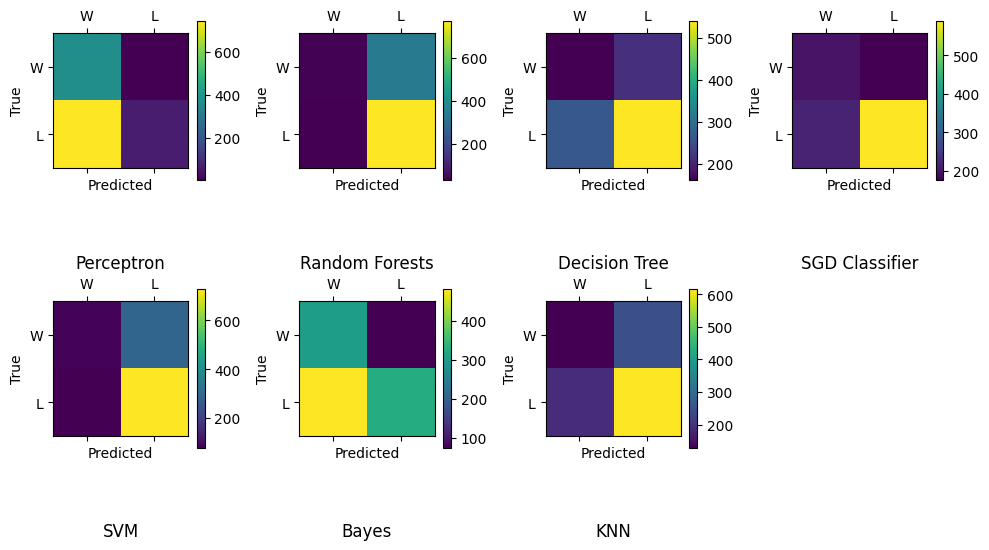

In [36]:
accuracies = run_all_and_Plot(data)
CompareAll = dict()
CompareAll['Baseline'] = accuracies
for key,val in accuracies.items():
    print(str(key) +' '+ str(val[0]))
plot_bar(accuracies)
plot_cm(accuracies)

Theoretically, we should get best results from our Random Forests Model, thus attempting to tune hyper parameters using GridSearch from Scikit learn

In [37]:
# 여기도 보류

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
#X_all = dropdata.drop(['winner'], axis=1)
#y_all = dropdata['winner']
#X_train, X_test, Y_train, Y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=23)
#rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True, max_depth=None) 
#param_grid = { 
#    'n_estimators': [200,700],
#    'max_features': ['auto', 'sqrt', 'log2']
#}

#CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
#CV_rfc.fit(X_train, Y_train)
#print(CV_rfc.best_params_)

# 2번

#### blue 데이터를 red 데이터로 나눠주는 부분. 이에 앞서 column 이름들을 다루기 쉽게 변환해준다. (inf와 nan이 너무 많이 나와서 이부분 보류 )

In [38]:
# 일단 이거는 보류
# dontchange = ['winner','Event_ID','Fight_ID','Max_round','Last_round','B_Age','R_Age']
# numeric_cols = [col for col in dropdata if col not in dontchange]
# dropdata[numeric_cols] += 1 

In [39]:
# new_columns = []
# for col in data.columns:
#     new_col = "_" + col
#     new_columns.append(new_col)

In [40]:
# new_columns

In [41]:
# _data = data.copy()
# _data.columns = new_columns
# _data.rename(columns={"_Winner":"Winner"}, inplace=True)

In [42]:
# data.filter(regex='draw')

In [43]:
# _data.columns

In [44]:
# newDF = _data.copy()
# blue_cols = [col for col in _data.columns if '_B_' in col]
# red_cols = [col for col in _data.columns if '_R_' in col]
# for (blue,red) in zip(blue_cols,red_cols):
#     newkey = ''.join(str(blue).split('_')[2:])
#     _data[newkey] = _data[str(blue)]/_data[str(red)]
#     del _data[str(blue)]
#     del _data[str(red)]

In [45]:
# _data.columns

In [46]:
# _data.drop(columns = _data.filter(regex = "winby").columns, inplace=True)
# _data.drop(columns = _data.filter(regex = "Stance").columns, inplace=True)
# _data.drop(columns = _data.filter(regex = "_weight").columns, inplace=True)

In [47]:
# _data.isna().sum()

In [48]:
# _data

In [49]:
# _data.isna().sum()

In [50]:
# accuracies = run_all_and_Plot(_data)
# for key,val in accuracies.items():
#     print(str(key) +' '+ str(val[0]))
# CompareAll['Blue/Red'] = accuracies
# plot_bar(accuracies)
# plot_cm(accuracies)


# 3번

범주형 데이터들을 제거해 정확도가 높아지는지 확인해보자

Winner을 제외한 non-numeric data들을 걸러내자

In [51]:
dropdata = data.drop(columns=data.filter(regex="weight").columns)
dropdata.drop(columns=dropdata.filter(regex="Stance").columns, inplace = True)
dropdata.drop(columns=dropdata.filter(regex="win_by").columns, inplace = True)
dropdata.drop(columns=dropdata.filter(regex="title_bout").columns, inplace = True)

In [52]:
dropdata

,Winner,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,...,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,1,0.000000,0.0,0.420000,0.49500,0.330,0.36000,0.500000,1.000000,0.00,...,0,1,1,0,0,170.18,177.80,135.0,31.0,27.0
1,1,0.500000,0.0,0.660000,0.30500,0.300,0.50000,1.500000,0.000000,0.00,...,0,2,4,2,0,182.88,187.96,185.0,32.0,28.0
2,1,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.148468,0.098389,0.00,...,0,3,4,3,0,187.96,190.50,264.0,32.0,28.0
3,0,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.148468,0.098389,0.00,...,0,0,0,0,0,160.02,160.02,115.0,28.0,25.0
4,0,0.125000,0.0,0.535625,0.57875,0.185,0.16625,0.125000,0.187500,0.25,...,0,2,5,6,0,167.64,172.72,135.0,29.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5897,1,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.148468,0.098389,0.00,...,0,0,0,0,0,190.50,190.50,260.0,29.0,29.0
5898,1,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.148468,0.098389,0.00,...,0,0,0,0,0,177.80,177.80,170.0,29.0,29.0
5899,1,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.148468,0.098389,0.00,...,0,0,0,0,0,182.88,182.88,210.0,29.0,29.0
5900,1,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.148468,0.098389,0.00,...,0,0,0,0,0,187.96,187.96,225.0,29.0,30.0


Perceptron 0.3657917019475021
Random Forests 0.6841659610499576
Decision Tree 0.5935647756138865
SGD Classifier 0.6816257408975445
SVM 0.6850127011007621
Bayes 0.6240474174428451
KNN 0.6299745977984759


c:\Users\charl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


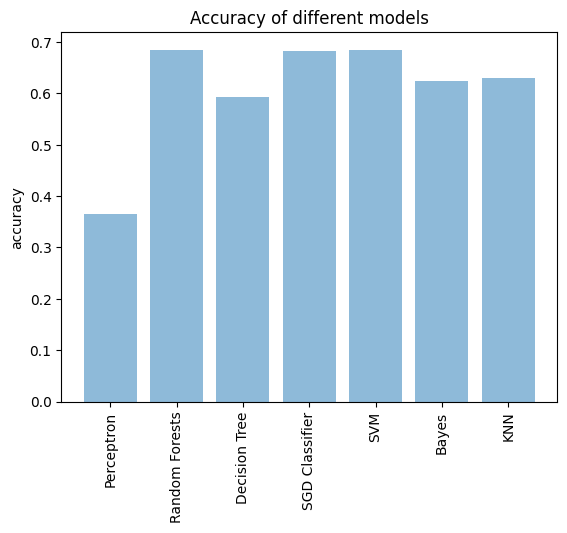

C:\Users\charl\AppData\Local\Temp\ipykernel_13160\3423334572.py:93: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\charl\AppData\Local\Temp\ipykernel_13160\3423334572.py:94: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


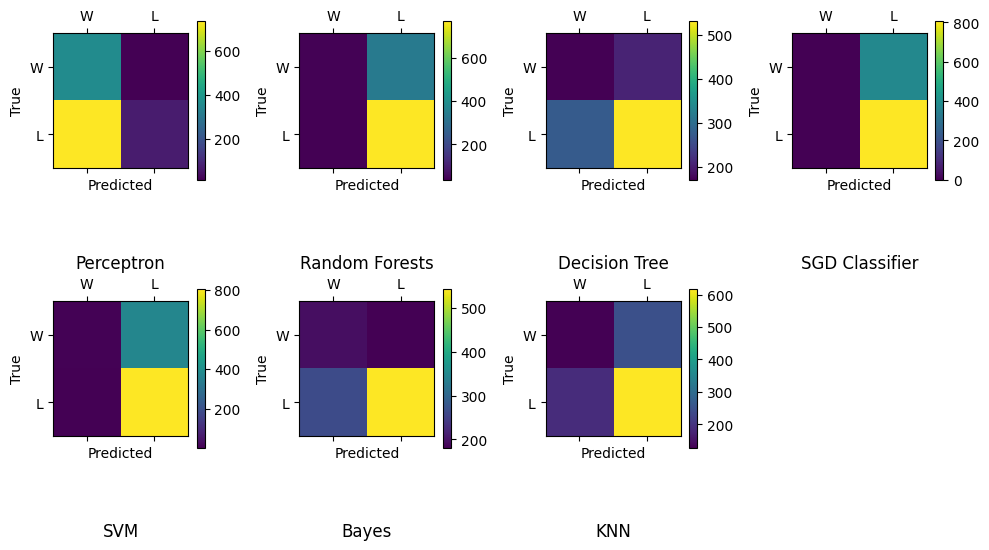

In [53]:
accuracies = run_all_and_Plot(dropdata)
CompareAll = dict()
CompareAll['Baseline'] = accuracies
for key,val in accuracies.items():
    print(str(key) +' '+ str(val[0]))
plot_bar(accuracies)
plot_cm(accuracies)

전체적으로 올라가는 듯...?